In [2]:
import sys
sys.path.append('..')
import dependencies
import soft_dependencies

Python Version 3.9.12 (main, Jun  1 2022, 06:36:29) 
[Clang 12.0.0 ]
Numpy Version 1.22.2
Scipy Version 1.7.3
Sklearn Version 1.0.2
Matplotlib Version 3.5.1
Pandas Version 1.4.2
Line Profiler Version 3.3.1
Memory Profiler Version 0.58.0


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

In [20]:
from Scripts.antGLasso import antGLasso, antGLasso_heuristic
from Scripts.nonparanormal_skeptic import nonparanormal_tensor_skeptic
from Scripts.generate_data import fast_tensor_normal_ks

In [24]:
from  matplotlib.animation import FuncAnimation, PillowWriter
%matplotlib notebook

In [5]:
np.set_printoptions(precision=3, suppress=True)
%load_ext line_profiler
%load_ext memory_profiler
%load_ext autoreload
%autoreload 2

# Moving MNIST Data

http://www.cs.toronto.edu/~nitish/unsupervised_video/

In [14]:
MNIST = np.load('../../Data/mnist_test_seq.npy')

In [16]:
print(MNIST.shape)
MNIST = np.moveaxis(MNIST, 1, 0)
print(MNIST.shape)

(20, 10000, 64, 64)
(10000, 20, 64, 64)


In [72]:
num_samples = 1000

In [83]:
# Have to apply some noise to MNIST otherwise we have constant cols/rows
noise = np.random.randint(0, 4, MNIST[:num_samples].shape)

In [84]:
Ss = nonparanormal_tensor_skeptic(MNIST[:num_samples]+noise)

In [85]:
Psis = antGLasso_heuristic(Ss, sparsities=[1, 1, 1])
np.fill_diagonal(Psis[0], 1)
np.fill_diagonal(Psis[1], 1)
np.fill_diagonal(Psis[2], 1)

In [86]:
generated = fast_tensor_normal_ks(Psis, size=1)[0]
generated += MNIST[:num_samples].mean(axis=0)

<IPython.core.display.Javascript object>


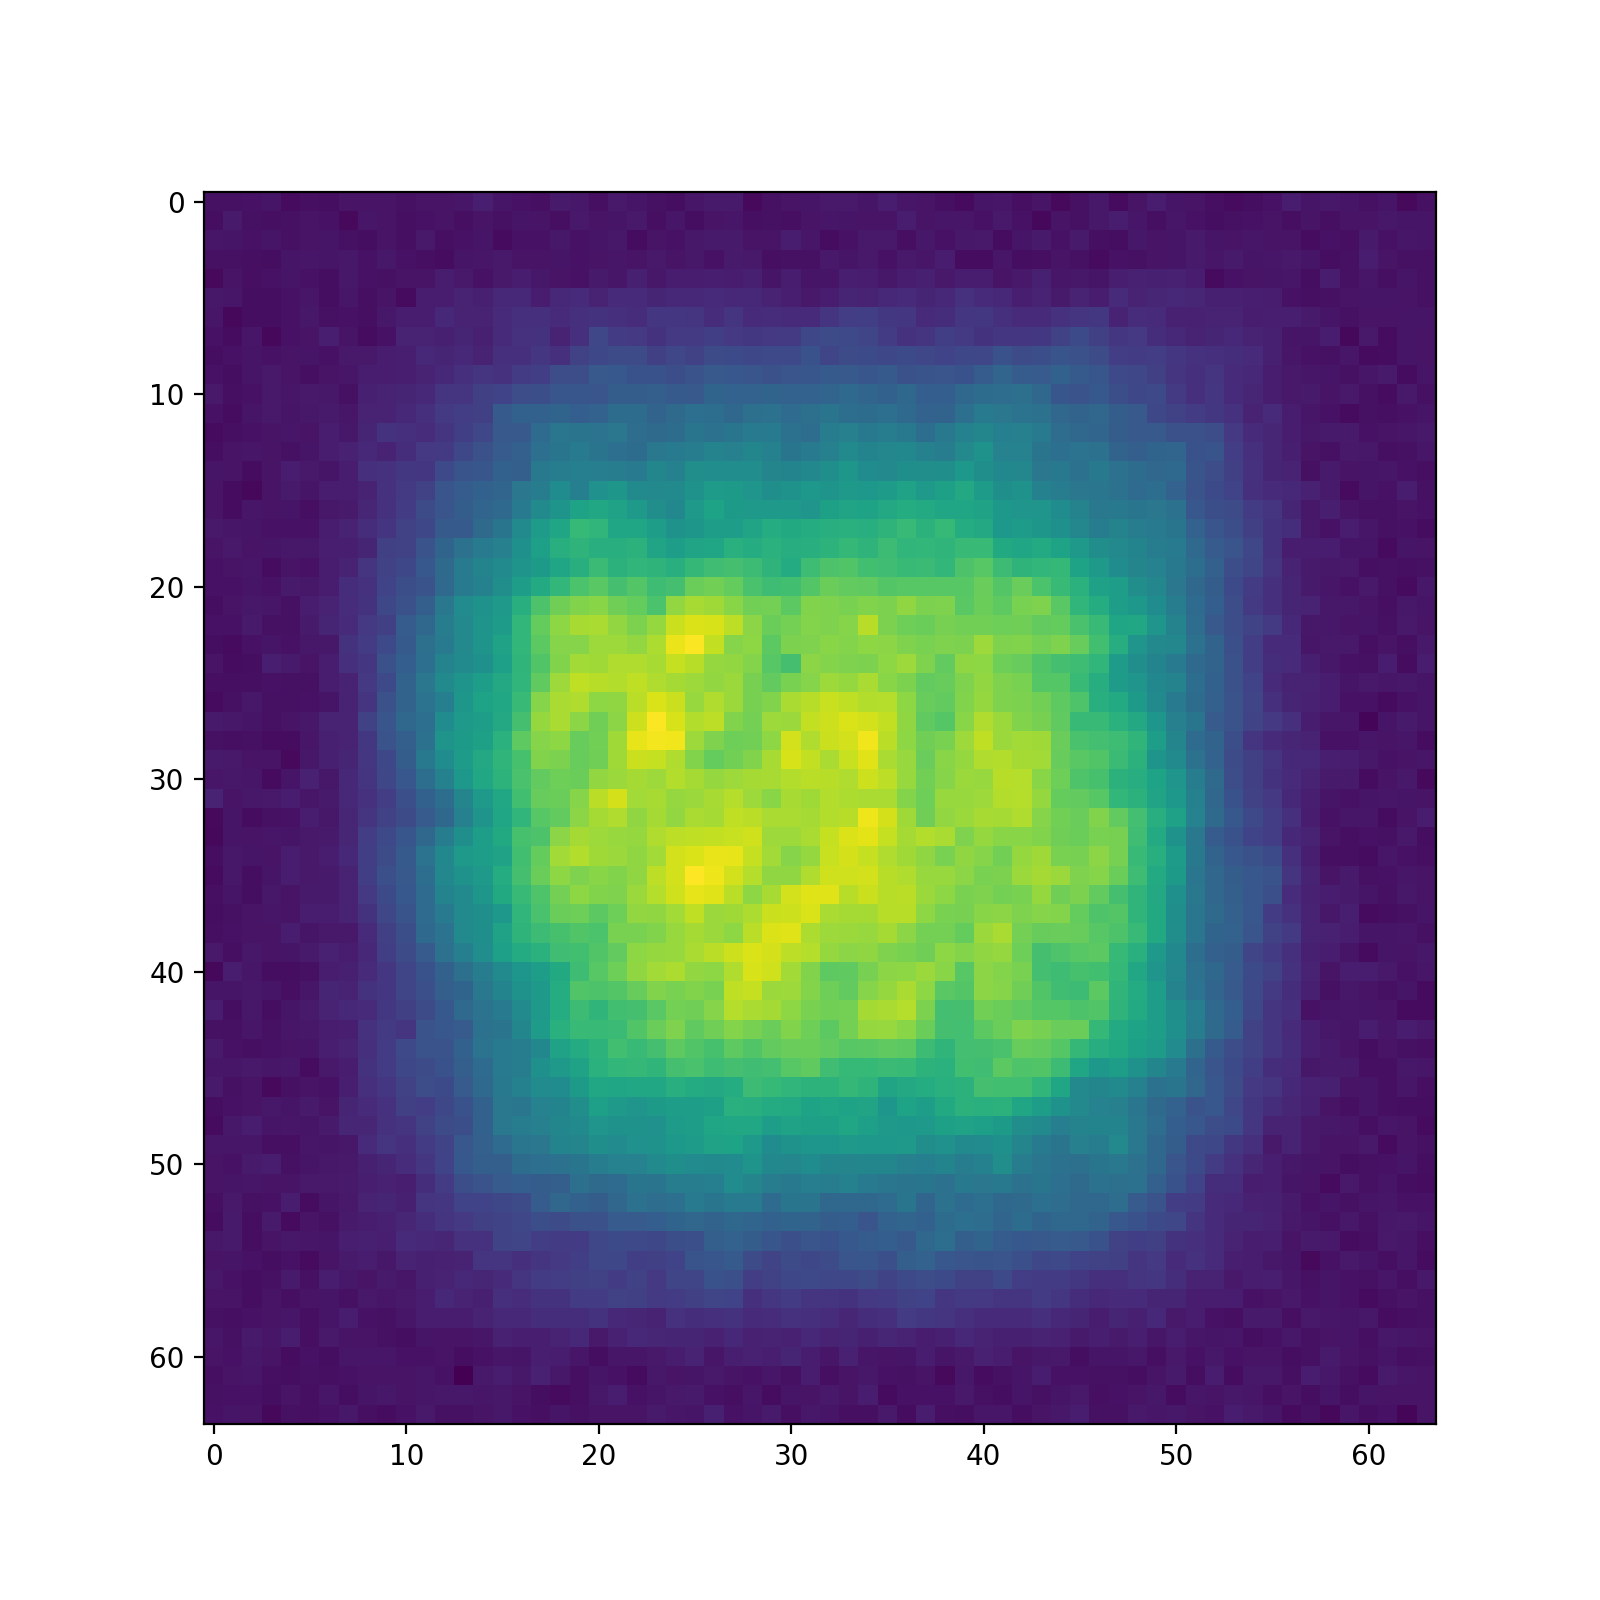

In [87]:
fig, ax = plt.subplots(figsize=(8, 8))
out = ax.imshow(generated[0])
def update(idx):
    out.set_data(generated[idx])
    return [out]
    
anim = FuncAnimation(fig, update, frames=len(generated), interval = 25, blit=True)
#anim.save("../../Plots/Final/Moving MNIST Generated.gif", dpi=80, writer=PillowWriter(fps=25))

# We can see that it's not good at generating samples from the distribution it learns